# Практическая работа №2
### Выполнила студентка группы БВТ2101 Пьянова Анна Олеговна

Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr
from tensorflow.keras import layers
from tensorflow.keras import models

Генерация данных

In [2]:
def genData(size=500):
  data = np.random.rand(size, 2)*2 - 1
  label = np.zeros([size, 1])

  for i, p in enumerate(data):
    if p[0]*p[1] >= 0:
      label[i] = 1.
    else:
      label[i] = 0.

  div = round(size*0.8)
  train_data = data[:div, :]
  test_data = data[div:, :]
  train_label = label[:div, :]
  test_label = label[div:, :]

  return (train_data, train_label), (test_data, test_label)

Функция для построения графиков

In [3]:
def drawResults(data, label, prediction):
  p_label = np.array([round(x[0]) for x in prediction])
  plt.scatter(data[:, 0], data[:, 1], s=30, c=label[:, 0], cmap=mclr.ListedColormap(['red', 'blue']))
  plt.scatter(data[:, 0], data[:, 1], s=10, c=p_label, cmap=mclr.ListedColormap(['red', 'blue']))
  plt.grid()
  plt.show()

Создание и обучение модели

In [4]:
(train_data, train_label), (test_data, test_label) = genData()

# Создание модели
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_dim=2))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
H = model.fit(train_data, train_label, epochs=90, batch_size=8, validation_split=0.1, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
#Получение ошибки и точности в процессе обучения
loss = H.history['loss']
val_loss = H.history['val_loss']
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
epochs = range(1, len(loss) + 1)

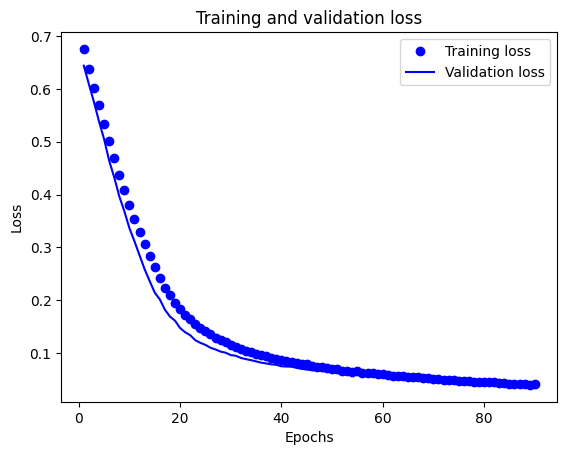

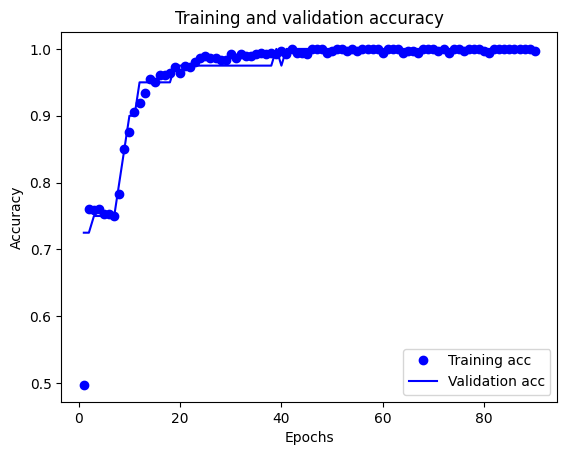

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9847 - loss: 0.0619  
[0.07447908073663712, 0.9800000190734863]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


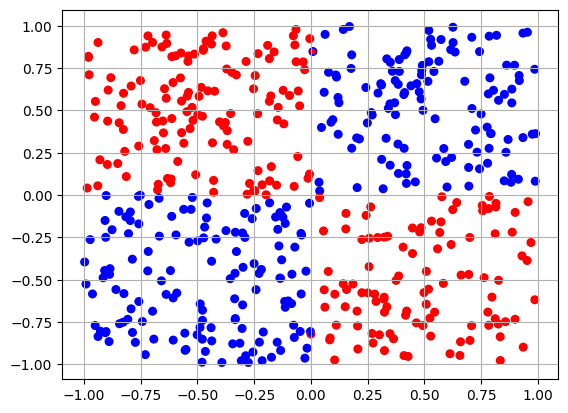

In [6]:
#Построение графика ошибки
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Построение графика точности
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Получение и вывод результатов на тестовом наборе
results = model.evaluate(test_data, test_label)
print(results)

#Вывод результатов бинарной классификации
all_data = np.vstack((train_data, test_data))
all_label = np.vstack((train_label, test_label))
pred = model.predict(all_data)
drawResults(all_data, all_label, pred)